In [35]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt 
%matplotlib inline 

In [36]:
words = open("names.txt", 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [37]:
len(words)

32033

In [45]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [76]:

block_size = 3 
X, Y = [], []
for w in words:
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        #print(''.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:] + [ix]
X = torch.tensor(X)
Y = torch.tensor(Y)

In [77]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [78]:
# C= torch.randn((27, 2))

In [8]:
# C

In [79]:
block_size = 3 

def build_dataset(words):  
    X, Y = [], []
    for w in words:
        #print(w)
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
            context = context[1:] + [ix] 
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

In [80]:
import random 
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182437, 3]) torch.Size([182437])
torch.Size([22781, 3]) torch.Size([22781])
torch.Size([22928, 3]) torch.Size([22928])


In [81]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [82]:
# C[5]

In [83]:
C = torch.randn((27, 2))

In [14]:
# C[torch.tensor([5, 6, 7, 7, 7, 7])]

In [84]:
C[X].shape

torch.Size([228146, 3, 2])

In [85]:
# X[13, 2]

In [86]:
# C[X][13, 2]

In [87]:
# C[1]

In [88]:
emb = C[X]
emb.shape

torch.Size([228146, 3, 2])

In [89]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [21]:
# C = torch.randn((27, 2))

In [59]:
# C[:6]

In [60]:
# emb = C[X]
# emb.shape

In [58]:
# W1 = torch.randn((6, 100))
# b1 = torch.randn(100)

In [91]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)

In [92]:
h

tensor([[-0.9802,  0.8214, -0.8879,  ...,  0.2572,  0.5309, -0.9830],
        [-0.9432, -0.5612, -0.8916,  ...,  0.8689, -0.7465, -0.7277],
        [-0.9975,  0.9997, -0.9996,  ...,  0.8414,  1.0000, -0.9996],
        ...,
        [-0.9993,  0.9678, -0.9836,  ...,  0.9820,  0.9999, -0.9996],
        [-1.0000, -0.9664, -0.9648,  ..., -0.9949,  0.9960, -1.0000],
        [-0.6733, -0.1676, -0.9290,  ...,  0.9894, -0.1943, -0.9750]])

In [63]:
h.shape

torch.Size([228146, 100])

In [93]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [66]:
logits = h @ W2 + b2

In [94]:
logits.shape

torch.Size([228146, 27])

In [95]:
counts = logits.exp()

In [96]:
prob = counts /counts.sum(1, keepdims = True)

In [97]:
prob.shape

torch.Size([228146, 27])

In [99]:
loss = -prob[torch.arange(32), Y].log().mean()
loss

IndexError: shape mismatch: indexing tensors could not be broadcast together with shapes [32], [228146]

In [100]:
batch_size = prob.size(0)

# select the first `batch_size` elements
Y_batch = Y[:batch_size]  
loss = -prob[torch.arange(batch_size), Y_batch].log().mean()

## DataSet 

In [101]:
Xtr.shape, Ytr.shape

(torch.Size([182437, 3]), torch.Size([182437]))

In [111]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [112]:
sum(p.nelement() for p in parameters)

11897

In [113]:
for p in parameters:
    p.requires_grad = True

In [114]:
# a way to create a spectrum of learning rates that increase in a non-linear way
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [131]:
lri = []
lossi = []
stepi = []

for i in range(200000):
    # minibatch
    ix = torch.randint(0, Xtr.shape[0], (32,))

    # forward pass
    emb = C[Xtr[ix]]  # (32, 3, 10)
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1)  # (32, 200)
    logits = h @ W2 + b2  # (32, 27)
    loss = F.cross_entropy(logits, Ytr[ix])

    for p in parameters:
        p.grad = None

    # backward pass
    loss.backward() 

    # Update parameters
    #lr = lrs[i]
    lr = 0.1 if i < 100000 else 0.01
    for p in parameters:
        p.data -= lr * p.grad  

    # Track stats
    stepi.append(i)
    lossi.append(loss.log10().item()) 

# print(loss.item())


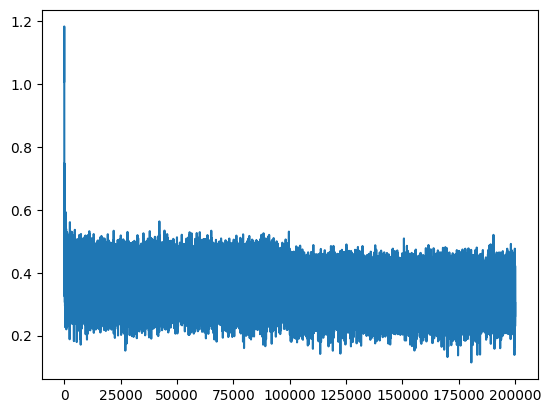

In [134]:
plt.plot(stepi, lossi)

In [132]:
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1859, grad_fn=<NllLossBackward0>)

In [133]:
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.2394, grad_fn=<NllLossBackward0>)

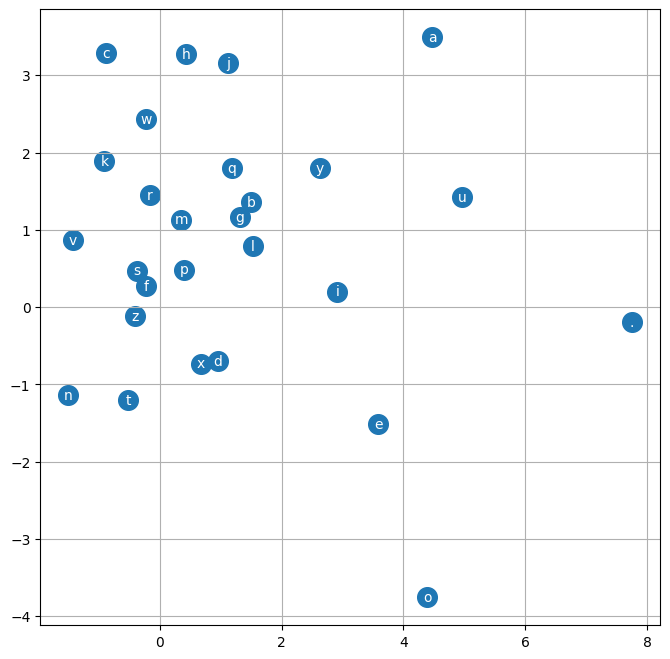

In [135]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [136]:
context = [0] * block_size
C[torch.tensor([context])].shape

torch.Size([1, 3, 10])

In [137]:
# results

g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
        emb = C[torch.tensor([context])] # (1,block_size,d)
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break
    
    print(''.join(itos[i] for i in out))

mria.
mayanniellendyn.
alarethrucengra.
gra.
chedielin.
shi.
jelle.
ellenna.
arleigh.
mhlee.
cayshabvrishiriel.
kindeweller.
nophorius.
kavder.
yarue.
elsy.
majayston.
azhil.
aalyansux.
zalel.


In [151]:
# a way to create a spectrum of learning rates that increase in a non-linear way
lre = torch.linspace(-3, 0, 200000)
lrs = 10**lre

In [152]:
lri = []
lossi = []
stepi = []

for i in range(200000):
    # minibatch
    ix = torch.randint(0, Xtr.shape[0], (32,))

    # forward pass
    emb = C[Xtr[ix]]  # (32, 3, 10)
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1)  # (32, 200)
    logits = h @ W2 + b2  # (32, 27)
    loss = F.cross_entropy(logits, Ytr[ix])

    for p in parameters:
        p.grad = None

    # backward pass
    loss.backward() 

    # Update parameters
    lr = lrs[i]
#     lr = 0.1 if i < 100000 else 0.01
    for p in parameters:
        p.data -= lr * p.grad  

    # Track stats
    lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.log10().item()) 

# print(loss.item())


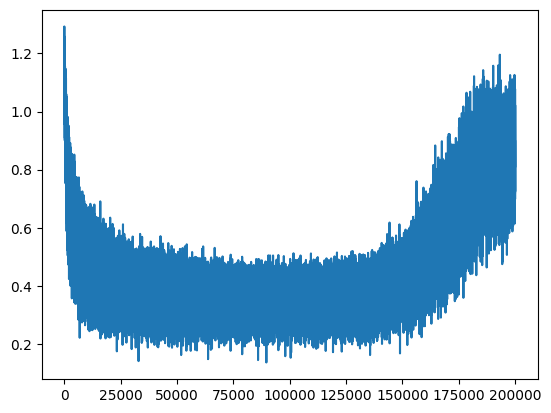

In [153]:
plt.plot(stepi, lossi)

In [154]:
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(8.6998, grad_fn=<NllLossBackward0>)

In [155]:
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(8.7566, grad_fn=<NllLossBackward0>)

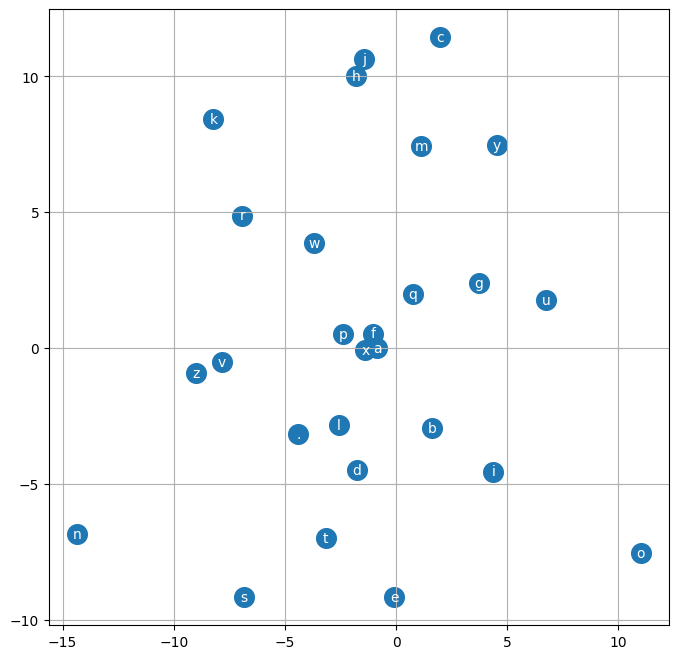

In [156]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [157]:
context = [0] * block_size
C[torch.tensor([context])].shape

torch.Size([1, 3, 10])

In [158]:
# results

g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
        emb = C[torch.tensor([context])] # (1,block_size,d)
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break
    
    print(''.join(itos[i] for i in out))

stelelyn.
seleuh.
seley.
selen.
ssebelandlew.
selen.
selen.
selen.
selen.
selelaysolyn.
selelyn.
selen.
sshlhn.
selen.
selelelxn.
selen.
selyn.
selylen.
seleuh.
sselek.


In [ ]:
h = emb.view(-1, 6) @ W1 + b1

In [ ]:
emb @ W1 + b1

In [ ]:
emb[:, 0, :].shape, emb[:, 1, :].shape, emb[:, 2, :].shape

In [ ]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1).shape

In [ ]:
torch.cat(torch.unbind(emb, 1), 1).shape

In [ ]:
h = emb.view(-1, 6) @ W1 + b1